# Viewing basis functions using pyEXP
This example uses the Better example in the EXP/examples directory and assumes that you have run the simulation using EXP.  Easily adapted for other circumstances.

We begin by including the usual header material.  Then point at your desired working directory.

In [1]:
import os
import yaml
import time
import pyEXP
import numpy as np
import matplotlib.pyplot as plt

os.chdir('/data/Nbody/Better')

## Making the biorthogonal basis instances for the halo and disk
Every basis needs a YAML.  These are copied directly from the EXP YAML config file for the halo and disk.

In [2]:
# Make the halo basis config
halo_config="""
---
id: sphereSL
parameters :
  numr: 2000
  rmin: 0.0001
  rmax: 1.95
  Lmax: 4
  nmax: 10
  rs: 0.0667
  modelname: SLGridSph.model
...
"""

# Make the disk basis config
#
disk_config = """
---
id: cylinder
parameters:
  acyl: 0.01
  hcyl: 0.001
  lmax: 32
  mmax: 6
  nmax: 32
  ncylorder: 8
  ncylnx: 256
  ncylny: 128
  rnum: 200
  pnum: 0
  tnum: 80
  ashift: 0.5
  vflag: 0
  logr: false
  density: false
  eof_file: .eof.cache.run0
...
"""

In [3]:
# Construct the basis instances
#
halo_basis = pyEXP.basis.Basis.factory(halo_config)
disk_basis = pyEXP.basis.Basis.factory(disk_config)

SLGridSph: opened <.slgrid_sph_cache>


---- SLGridSph::write_cached_table: done!!
---- EmpCylSL::cache_grid: file read successfully
---- EmpCylSL::read_cache: table forwarded to all processes


Look into the cache file

In [4]:
halo_basis.cacheInfo('.slgrid_sph_cache')
disk_basis.cacheInfo('.eof.cache.run0')

------------------------------------------------------------
Cache parameters for SLGridSph: .slgrid_sph_cache
------------------------------------------------------------
model               : 
lmax                : 4
nmax                : 10
numr                : 2000
cmap                : 1
rmin                : 0.00020000000000000001
rmax                : 1.98
scale               : 1
diverge             : 0
dfac                : 1
------------------------------------------------------------
------------------------------------------------------------
Cache parameters for EmpCylSL: .eof.cache.run0
------------------------------------------------------------
model               : Exponential
mmax                : 6
numx                : 256
numy                : 128
nmax                : 32
norder              : 8
neven               : 0
nodd                : 0
dens                : false
cmapr               : 1
cmapz               : 1
rmin                : 0.001
rmax                

## Viewing some basis functions
The `getBasis` member for each basis returns a vectors of arrays for the basis functions on the grid you have defined.  See the following examples.

In [5]:
# Get the two basis grids
#
lrmin = -3.0
lrmax = 0.5
rnum  = 200
halo_grid = halo_basis.getBasis(lrmin, lrmax, rnum)

Rmin = 0.0
Rmax = 0.1
Rnum = 100
Zmin = -0.03
Zmax =  0.03
Znum = 40

disk_grid = disk_basis.getBasis(Rmin, Rmax, Rnum, Zmin, Zmax, Znum)

Process 0: in EmpCylSL::gel_all, calling make_coefficients()


Now that we have the basis function grids, we can plot them.  Beginning with the halo.  The halo basis are one-dimensional functions.

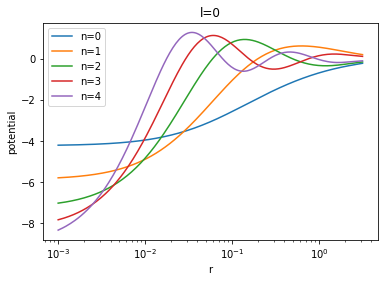

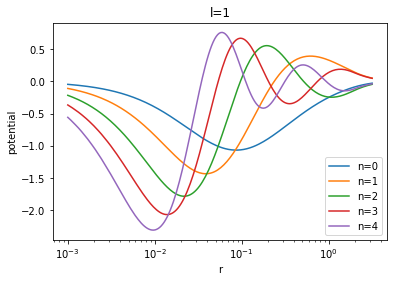

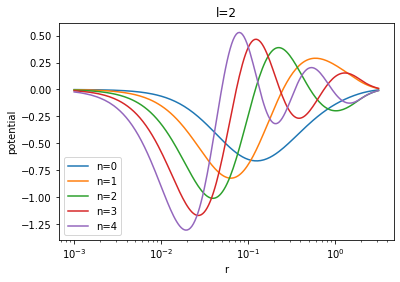

In [6]:
# Make a logarithmically space grid in radius
#
r = np.linspace(lrmin, lrmax, rnum)
r = np.power(10.0, r)

for l in range(3):
    for n in range(5):
        plt.semilogx(r, halo_grid[l][n], '-', label="n={}".format(n))
    plt.xlabel('r')
    plt.ylabel('potential')
    plt.title('l={}'.format(l))
    plt.legend()
    plt.show()
  

The cylindrical basis are two-dimensional merional planes.   We'll use `contourf` for those.

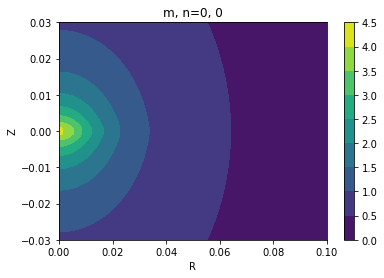

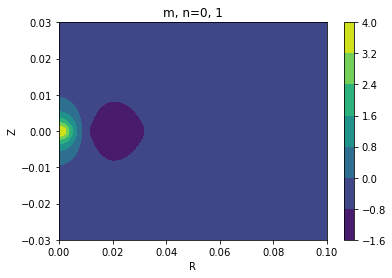

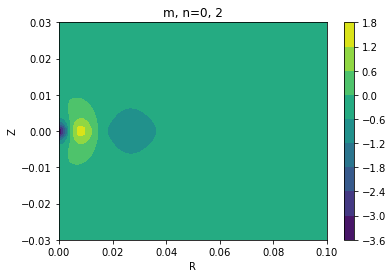

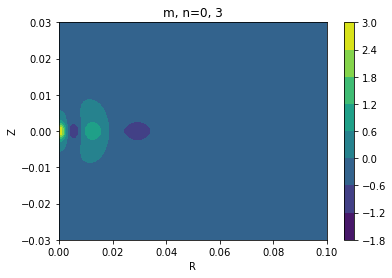

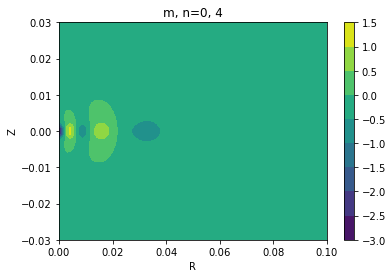

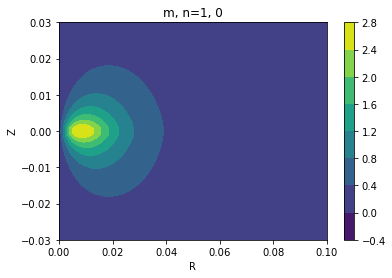

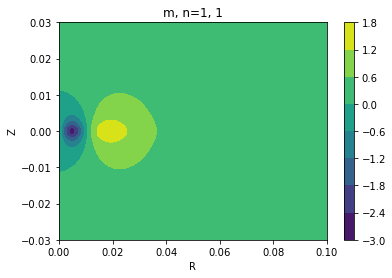

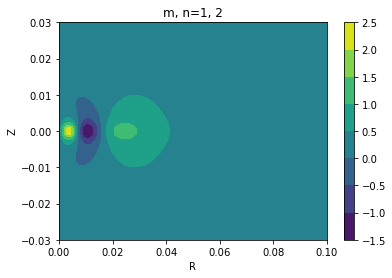

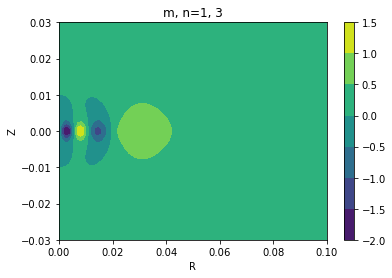

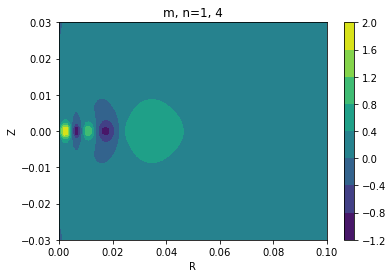

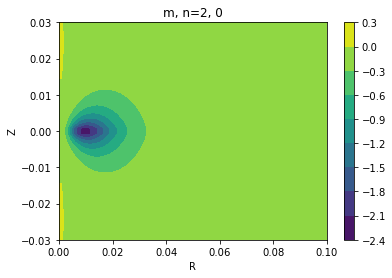

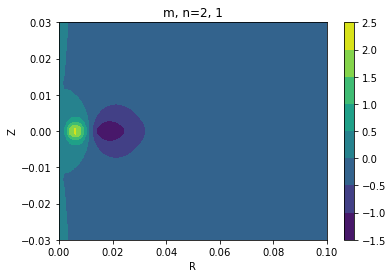

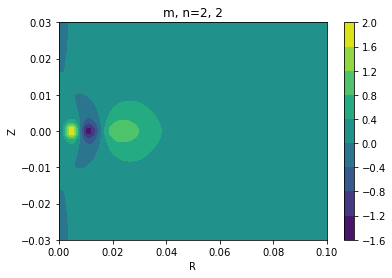

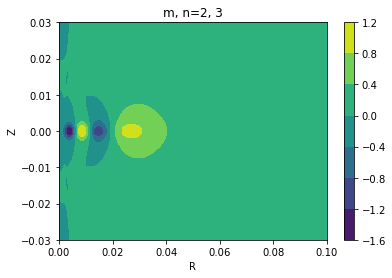

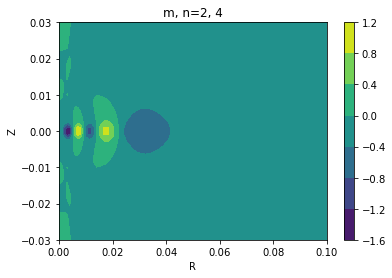

In [7]:
  
R = np.linspace(Rmin, Rmax, Rnum)
Z = np.linspace(Zmin, Zmax, Znum)

xv, yv = np.meshgrid(R, Z)

for m in range(3):
    for n in range(5):
        # Tranpose for contourf
        cx = plt.contourf(xv, yv, disk_grid[m][n].transpose())
        plt.xlabel('R')
        plt.ylabel('Z')
        plt.title('m, n={}, {}'.format(m, n))
        plt.colorbar(cx)
        plt.show()
    